<a href="https://colab.research.google.com/github/elangbijak4/AI-General/blob/main/Demo_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2769 - val_loss: 0.1867
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1690 - val_loss: 0.1519
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1435 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1279 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1174 - val_loss: 0.1119
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1103 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1055 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1019 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0992 - val_loss: 0.0970
Epoch 10/50
235/235 [======

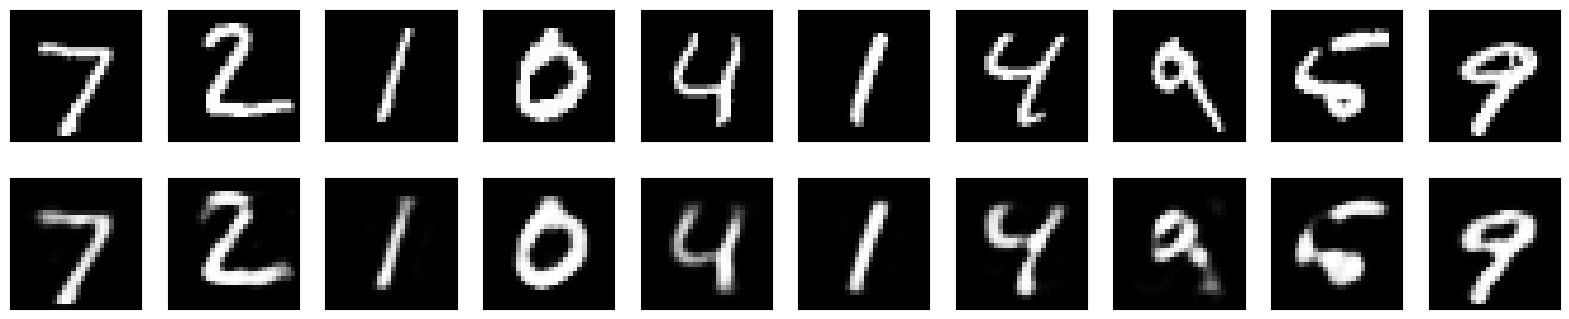

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define encoding dimension
encoding_dim = 32  # Dimensionality of the latent space

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()